## ***BATCH*** **GRADIENT** **DESCENT** (ON REAL TIME DATA)

---






In [655]:
# importing all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale

In [656]:
# READING THE  DATA SET
data = pd.read_csv("water.csv")
data.head()

,X,Y
0,75.1,577.8
1,74.3,577.0
2,88.7,570.9
3,114.6,578.6
4,98.5,572.4


## DATA ANALYSIS AND VISUALISATION

---

In [657]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       30 non-null     float64
 1   Y       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [658]:
data.describe()


,X,Y
count,30.000000,30.000000
mean,90.273333,514.963333
std,16.986078,39.535096
min,62.200000,406.700000
25%,75.300000,505.250000
50%,89.150000,510.100000
75%,104.375000,519.850000
max,120.000000,578.600000


## NULL value Treatment

In [659]:
data.isnull().sum()

X    0
Y    0
dtype: int64

**Observation:** the given dataset do not contain any null values

## **Outliners** Treatment

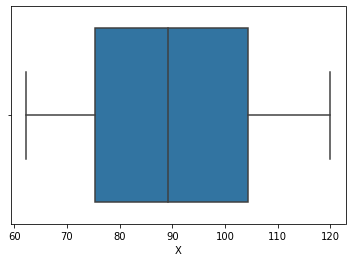

In [660]:
sns.boxplot(x=data['X'])


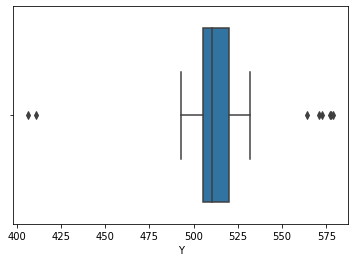

In [661]:
sns.boxplot(x=data['Y'])

From above box plot, we can conclude that the dataset is holding few outliners. we need to remove them

# <u>Removal Of outliers</u>
 <ol>
 <li>Using Z score</li>
 <li> and Using ITQ</li>
</ol>

In [662]:
# Z-SCORE
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[0.90855142 1.61656054]
 [0.95645395 1.59597943]
 [0.09420832 1.43904846]
 [1.45663625 1.63714165]
 [0.49259774 1.47763804]
 [1.30095302 2.6694559 ]
 [1.46861189 0.430574  ]
 [1.68097979 1.25896373]
 [1.00156217 2.78522465]
 [0.01357238 0.20229517]
 [0.98639304 0.47756754]
 [1.52849006 0.25117531]
 [0.54648809 0.22030365]
 [0.16326781 0.12254337]
 [0.98040522 0.28461962]
 [1.4714062  0.22544892]
 [1.44146712 0.22287629]
 [0.74089254 0.12254337]
 [1.16922104 0.16370559]
 [0.9057571  0.10453489]
 [0.10019614 0.24603004]
 [0.04031797 0.05565476]
 [0.98639304 0.31291865]
 [0.66025661 0.56503726]
 [1.77997837 0.10710753]
 [0.86064888 0.05565476]
 [0.84268543 0.04021892]
 [0.50137987 0.12768865]
 [0.35767226 0.27432906]
 [0.46265865 0.18102803]]


In [663]:
threshold = 3
print(np.where(z > 3))

(array([], dtype=int64), array([], dtype=int64))


#### **Observation**:no outliners are found using Z-score test

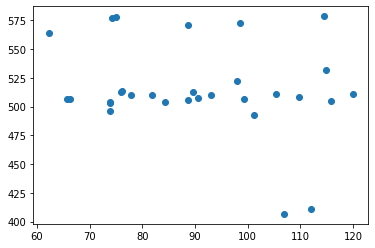

In [664]:
# Visualising data points using a Scatter plot
plt.scatter(data['X'],data['Y'])

In [665]:
# Implementing ITQ
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1
iqr


X    29.075
Y    14.600
dtype: float64

In [666]:
data.shape

(30, 2)

In [667]:
data_cleared = data[~((data < (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))).any(axis=1)]
data_cleared.shape

(22, 2)

### After implementing ITQ, 8 rows are treated as outliners and those are ignored from dataset

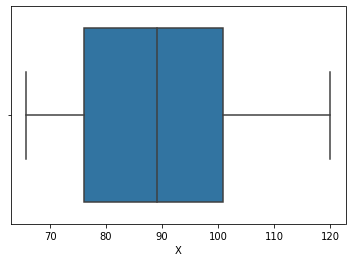

In [668]:
sns.boxplot(x=data_cleared['X'])

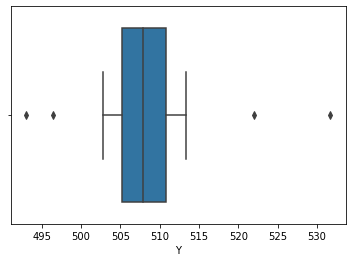

In [669]:
# outliners are reduced
sns.boxplot(x=data_cleared['Y'])

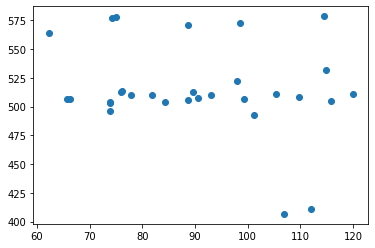

In [670]:
# scatter plot of data before data clean
plt.scatter(data['X'],data['Y'])

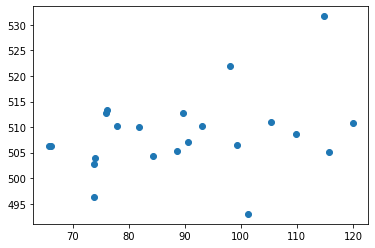

In [671]:
#scatter plot of data after data clean
plt.scatter(data_cleared['X'],data_cleared['Y'])

In [672]:
data2 = data.copy()
data = data_cleared.copy()

In [673]:
from sklearn.model_selection import train_test_split

## **Normalisation Of Data Set**

---

In [674]:
data_x = data['X']
data_y = data['Y']

# normalising the data
data_x = (data_x - data_x.min())/(data_x.max() - data_x.min())
data_y = (data_y - data_y.min())/(data_y.max() - data_y.min())
data_x

data_x = np.array(data_x)
data_y = np.array(data_y)
datas =[]
for i in range(len(data_x)):
  datas.append([data_x[i],data_y[i]])

datas[1:10]

[[0.45672191528545114, 0.364341085271318],
 [0.14917127071823194, 0.08785529715762205],
 [0.9226519337016574, 0.31524547803617503],
 [0.6206261510128914, 0.3462532299741592],
 [0.5027624309392265, 0.44444444444444364],
 [0.15101289134438312, 0.2816537467700249],
 [0.0, 0.3410852713178288],
 [0.009208103130755065, 0.34366925064599474],
 [0.22467771639042364, 0.44444444444444364]]

In [675]:
# splitting of data set into training and testing
data_train,data_test = train_test_split(datas,test_size=0.1)

In [676]:
data_train

[[0.5027624309392265, 0.44444444444444364],
 [0.6206261510128914, 0.3462532299741592],
 [0.9042357274401472, 1.0],
 [0.14917127071823194, 0.08785529715762205],
 [1.0, 0.4599483204134365],
 [0.1878453038674034, 0.5116279069767424],
 [0.4217311233885818, 0.3204134366925055],
 [0.15101289134438312, 0.2816537467700249],
 [0.0, 0.3410852713178288],
 [0.5948434622467771, 0.7493540051679578],
 [0.3425414364640883, 0.2919896640826873],
 [0.29834254143646416, 0.4392764857881132],
 [0.9226519337016574, 0.31524547803617503],
 [0.8121546961325966, 0.40310077519379856],
 [0.7311233885819522, 0.4625322997416009],
 [0.19337016574585636, 0.5271317829457353],
 [0.14917127071823194, 0.2532299741602067],
 [0.009208103130755065, 0.34366925064599474],
 [0.22467771639042364, 0.44444444444444364]]

## ***Ready*** To Train The Model
---

In [677]:
#STEP 2: initialising required parameters
m = 1
c = -1
iter = 1
epochs = 300
alpha = 0.1
error = []
data_train

[[0.5027624309392265, 0.44444444444444364],
 [0.6206261510128914, 0.3462532299741592],
 [0.9042357274401472, 1.0],
 [0.14917127071823194, 0.08785529715762205],
 [1.0, 0.4599483204134365],
 [0.1878453038674034, 0.5116279069767424],
 [0.4217311233885818, 0.3204134366925055],
 [0.15101289134438312, 0.2816537467700249],
 [0.0, 0.3410852713178288],
 [0.5948434622467771, 0.7493540051679578],
 [0.3425414364640883, 0.2919896640826873],
 [0.29834254143646416, 0.4392764857881132],
 [0.9226519337016574, 0.31524547803617503],
 [0.8121546961325966, 0.40310077519379856],
 [0.7311233885819522, 0.4625322997416009],
 [0.19337016574585636, 0.5271317829457353],
 [0.14917127071823194, 0.2532299741602067],
 [0.009208103130755065, 0.34366925064599474],
 [0.22467771639042364, 0.44444444444444364]]

## Gradient Descent Algorithm

In [678]:
# while loop is runned until iter reaches epochs
while (iter<=epochs):
  # running for loop to calculate and update model parameters for each sample
  der_m = 0
  der_c = 0
  err = 0
  for i in range(0,len(data_train)):
    # calculating derivatives of m and c
    der_m += ((data_train[i][1] - (m * data_train[i][0]) - c ))*(data_train[i][0])
    der_c +=  (data_train[i][1] - (m * data_train[i][0]) - c )

  # computing error rate with present m and c values 
  err = (der_c)**2
  err = (err)/(2*len(data_train))
  error.append(err)


  der_m = (-1)*(1/len(data_train))*der_m
  der_c = (-1)*(1/len(data_train))*der_c

  # calculating change in m and c
  change_m = (-1)*alpha*der_m
  change_c = (-1)*alpha*der_c

  #updating m and c
  m = m + change_m
  c = c + change_c


  #incrementing no of iterations
  iter = iter + 1
 


In [679]:
# computed slope and y-intercept
print(m,c)

0.3576223220060807 0.2640345274806709


In [680]:
data_test = np.array(data_test)
data_test_x = data_test[:,0]
print(data_test_x)
data_test_y = data_test[:,1]
data_test_y

[0.45672192 0.44014733 0.65561694]


array([0.36434109, 0.51162791, 0.        ])

In [681]:
# predicting results of test data set
pred = []
for i in range(len(data_test_x)):
  print((m*data_test_x[i]) +c)
  pred.append((m*data_test_x[i]) +c)

0.42736847933611843
0.42144103753491263
0.4984977809505875


## Mean Squared error of testing data

In [682]:
# computig mean squared error of testing data
mse = 0
for i in range(0,len(data_test)):
  mse += (data_test[i][1] - (m*data_test[i][0]) - c)**2
mse = mse/len(data_test)
mse

0.08686872047832574

## Predicted Data Visualisation

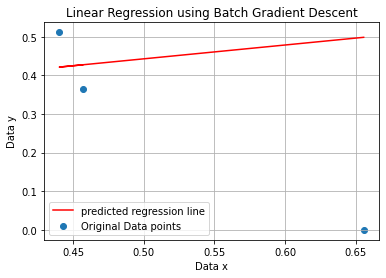

In [683]:
plt.scatter(data_test_x,data_test_y,label="Original Data points")
plt.plot(data_test_x,pred,'r',label="predicted regression line")
plt.title("Linear Regression using Batch Gradient Descent")
plt.xlabel("Data x")
plt.ylabel("Data y")
plt.grid()
plt.legend()
plt.show()

In [684]:
data_train = pd.DataFrame(data_train)

data_train_pred = m*data_train[0] + c
data_train_pred 



0     0.443834
1     0.485984
2     0.587409
3     0.317382
4     0.621657
5     0.331212
6     0.414855
7     0.318040
8     0.264035
9     0.476764
10    0.386535
11    0.370728
12    0.593995
13    0.554479
14    0.525501
15    0.333188
16    0.317382
17    0.267328
18    0.344384
Name: 0, dtype: float64

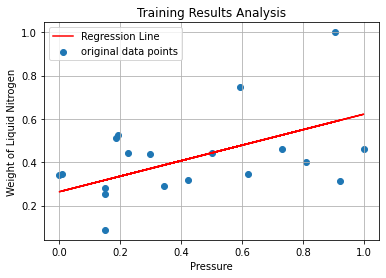

In [685]:
plt.plot(data_train[0],data_train_pred,'red',label="Regression Line")
plt.scatter(data_train[0],data_train[1],label="original data points")
plt.xlabel("Pressure")
plt.ylabel("Weight of Liquid Nitrogen")
plt.legend()
plt.grid()
plt.title("Training Results Analysis")
plt.show()
%matplotlib inline

In [686]:
data_train.head()

,0,1
0,0.502762,0.444444
1,0.620626,0.346253
2,0.904236,1.000000
3,0.149171,0.087855
4,1.000000,0.459948


## Error Rate Analysis

---

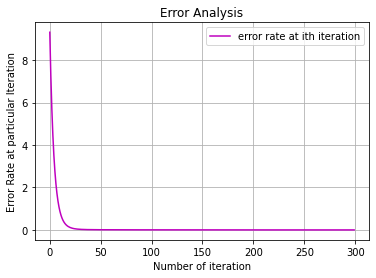

In [687]:
iters = np.arange(epochs)
plt.plot(iters,error,color='m',label="error rate at ith iteration")
plt.legend()
plt.xlabel("Number of iteration")
plt.ylabel("Error Rate at particular Iteration")
plt.title("Error Analysis")
plt.grid()
plt.show()


## Mean Squared Error Of Training Data

In [688]:
# computig mean squared error
mse = 0
mse = (data_train[1] - m*data_train[0] - c)**2
mse.sum()/len(data_train)



0.029863821277481883

In [689]:
min_x = data2['X'].min()
max_x = data2['X'].max()
min_y = data2['Y'].min()
max_y = data2['Y'].max()
print(min_x,min_y,max_x,max_y)

62.2 406.7 120.0 578.6


## Model Ready To Take Input and Produce Output

In [690]:
input_x = float(input("enter pressure"))
input_x = (input_x - min_x)/(max_x - min_x)
output_y = m*input_x + c
output_y = (output_y)*(max_y - min_y) + min_y
output_y

enter pressure75.1


465.8077960917769

In [691]:
err = 0
for i in range(0,len(data_x)):
  input_x = data2['X'][i]
  input_x = (input_x - min_x)/(max_x - min_x)
  output_y = m*input_x + c
  output_y = (output_y)*(max_y - min_y) + min_y
  err += (output_y-data2['Y'][i])**2
  print(output_y,data2['Y'][i])

print("\n",err)
print(err/len(data_x))

465.8077960917769 577.8
464.95692720384824 577.0
480.272567186564 570.9
507.8194474332542 578.6
490.69571106369006 572.4
505.05412354748603 411.2
508.03216465523633 531.7
452.0875352739273 563.9
499.736192997932 406.7
482.1870221844035 507.1
464.4251341488928 496.4
509.09575076514716 505.2
491.65293856260973 506.4
484.8459874591805 510.2
464.5314927598839 503.9
455.8100866586152 506.2
456.3418797135706 506.3
468.7858371995272 510.2
502.7142341056823 508.6
498.03445522207466 510.9
480.1662085755729 505.4
481.22979468548374 512.8

 88173.31946541333
4007.8781575187877
